# Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Data

In [3]:
df = pd.read_csv("D:\\Practice CSV\\Car Sales\\Car_sales.csv")

df.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


# Missing Data Handling

In [4]:
# Checking for missing values
df.isnull().sum()

Manufacturer            0
Model                   0
Sales_in_thousands      0
__year_resale_value    36
Vehicle_type            0
Price_in_thousands      2
Engine_size             1
Horsepower              1
Wheelbase               1
Width                   1
Length                  1
Curb_weight             2
Fuel_capacity           1
Fuel_efficiency         3
Latest_Launch           0
Power_perf_factor       2
dtype: int64

In [5]:
# Fill missing values or drop rows if necessary

df.dropna(subset=['__year_resale_value'], inplace = True)

df.fillna(method = 'ffill', inplace = True)

# Top 5 Manufacturers by Sales


In [5]:
top_manufacturers = df.groupby('Manufacturer')['Sales_in_thousands'].sum().sort_values(ascending = False).head()

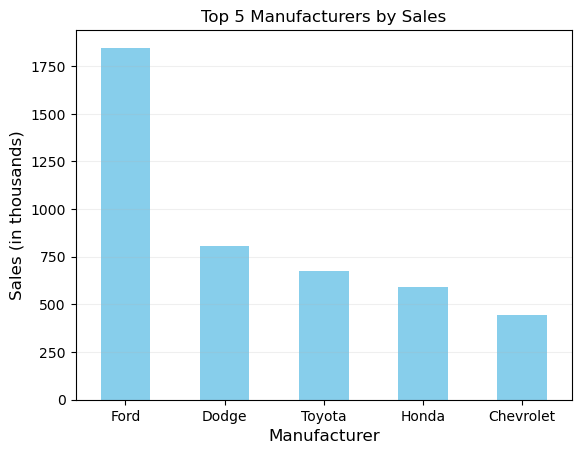

In [8]:
top_manufacturers.plot(kind = 'bar', color='skyblue')
plt.title('Top 5 Manufacturers by Sales', fontsize = 12)  
plt.xlabel('Manufacturer', fontsize = 12)                 
plt.ylabel('Sales (in thousands)', fontsize = 12)
plt.grid(alpha = 0.2, axis = 'y')
plt.xticks(rotation = 0)
plt.show()

# Correlation Analysis: Horsepower vs Price

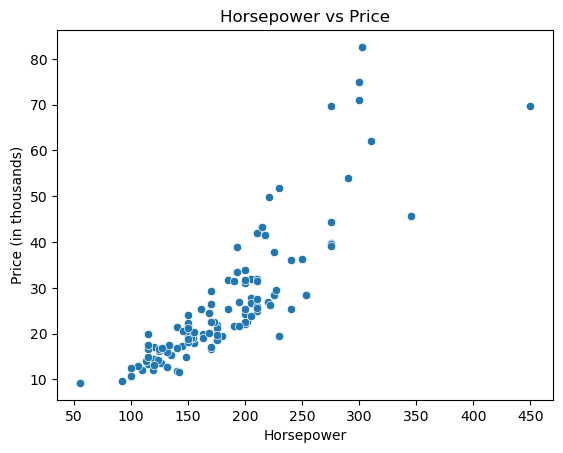

In [10]:
sns.scatterplot(x='Horsepower', y='Price_in_thousands', data=df)
plt.title('Horsepower vs Price')
plt.xlabel('Horsepower')
plt.ylabel('Price (in thousands)')
plt.show()

In [12]:
# Calculate the correlation coefficient

correlation = df['Horsepower'].corr(df['Price_in_thousands'])

print(f'Correlation between Horsepower and Price: {correlation:.2f}')

Correlation between Horsepower and Price: 0.85


# Fuel Efficiency Distribution

In [9]:
df.columns

Index(['Manufacturer', 'Model', 'Sales_in_thousands', '__year_resale_value',
       'Vehicle_type', 'Price_in_thousands', 'Engine_size', 'Horsepower',
       'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity',
       'Fuel_efficiency', 'Latest_Launch', 'Power_perf_factor'],
      dtype='object')

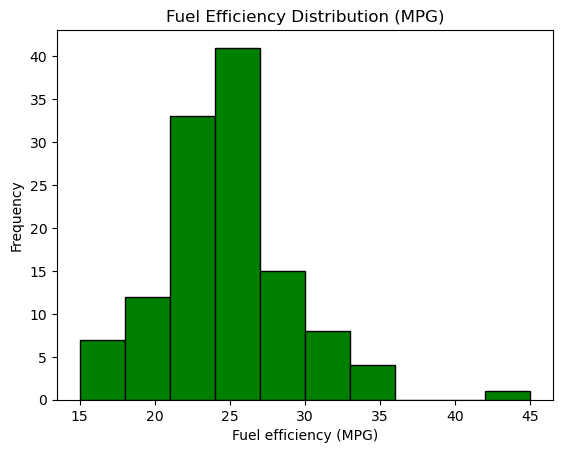

In [19]:
df['Fuel_efficiency'].plot(kind='hist', bins = 10, color='green', edgecolor='black')
plt.title('Fuel Efficiency Distribution (MPG)')
plt.xlabel('Fuel efficiency (MPG)')
plt.show()

# Top 5 Most Expensive Cars

In [7]:
most_expensive = df[['Manufacturer', 'Model', 'Price_in_thousands']].sort_values(['Price_in_thousands'], ascending = False)

most_expensive.head(5)

,Manufacturer,Model,Price_in_thousands
95,Mercedes-B,SL-Class,82.600
126,Porsche,Carrera Cabrio,74.970
125,Porsche,Carrera Coupe,71.020
39,Dodge,Viper,69.725
94,Mercedes-B,S-Class,69.700


# Vehicle Type Distribution

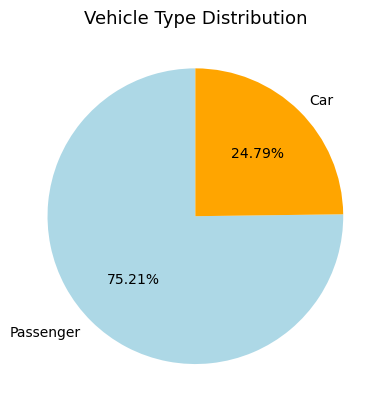

In [13]:
v_type = df['Vehicle_type'].value_counts()

v_type.plot(kind = 'pie', autopct = '%.2f%%', startangle=90, colors=['lightblue', 'orange'])
plt.title('Vehicle Type Distribution', fontsize = 13)
plt.ylabel('')
plt.show()

# Price vs. Fuel Efficiency

In [5]:
df.columns

Index(['Manufacturer', 'Model', 'Sales_in_thousands', '__year_resale_value',
       'Vehicle_type', 'Price_in_thousands', 'Engine_size', 'Horsepower',
       'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity',
       'Fuel_efficiency', 'Latest_Launch', 'Power_perf_factor'],
      dtype='object')

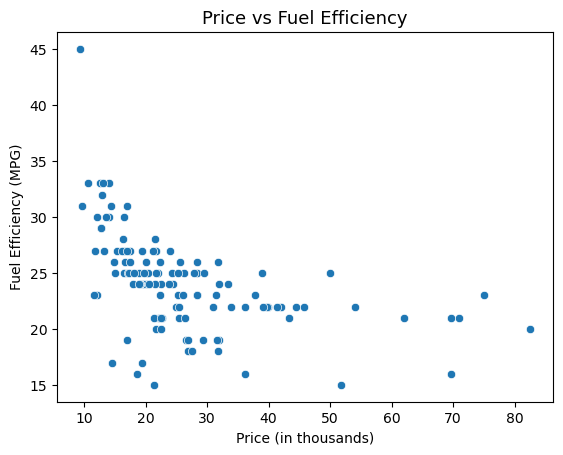

In [16]:
# Scatter plot of Price vs Fuel Efficiency
sns.scatterplot(x='Price_in_thousands', y='Fuel_efficiency', data=df)
plt.title('Price vs Fuel Efficiency', fontsize = 13)
plt.xlabel('Price (in thousands)')
plt.ylabel('Fuel Efficiency (MPG)')
plt.show()

# Cars with the Best Resale Value

In [8]:
top_resale_value = df[['Manufacturer', 'Model', '__year_resale_value']].sort_values(by='__year_resale_value', ascending=False).head(5)

top_resale_value

,Manufacturer,Model,__year_resale_value
126,Porsche,Carrera Cabrio,67.550
125,Porsche,Carrera Coupe,60.625
95,Mercedes-B,SL-Class,58.600
39,Dodge,Viper,58.470
94,Mercedes-B,S-Class,50.375


# Cars with the Best Power-to-Performance Ratio

In [10]:
df.columns

Index(['Manufacturer', 'Model', 'Sales_in_thousands', '__year_resale_value',
       'Vehicle_type', 'Price_in_thousands', 'Engine_size', 'Horsepower',
       'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity',
       'Fuel_efficiency', 'Latest_Launch', 'Power_perf_factor'],
      dtype='object')

In [12]:
df['Power_to_Performance'] = df['Horsepower'] / df['Price_in_thousands']

# Top 5 cars by power-to-performance ratio
best_power_performance = df[['Manufacturer', 'Model', 'Power_to_Performance']].sort_values(by='Power_to_Performance', ascending=False).head(5)
best_power_performance


,Manufacturer,Model,Power_to_Performance
140,Toyota,Tacoma,12.317835
63,Hyundai,Elantra,11.865412
40,Dodge,Ram Pickup,11.819116
114,Plymouth,Neon,10.443038
35,Dodge,Neon,10.443038
